In [1]:
# Question: why is Earl's crl data mismatched with its flight level data on 9/8/22?
#           The CRL data seems relatively in sync with the in situ data to start,
#           but the in situ data moves 'too quickly' by the end (3 in situ eye passes, but only 2 crl passes)
#           It's probably the best dataset from Earl that we have, so it would be quite nice to correct this one :)

In [1]:
# import...
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

os.chdir("/Users/etmu9498/research/code/scripts-winter2023/")
import helper_fns_winter2023 as helper_fns
sys.path.append(  "/Users/etmu9498/research/code/scripts-winter2023/cloud-top-height-stats")
import find_cloud_tops


In [2]:
# load data for 9/8
os.chdir("/Users/etmu9498/research/data/CRL_data/2022/")
crl_raw = xr.open_dataset("P3_20220908H1_095405-141758.cdf")

os.chdir("/Users/etmu9498/research/data/in-situ-noaa-full/2022/")
fl_raw = xr.open_dataset("20220908H1_earl.nc", decode_times=False)

fl_test = xr.open_dataset("20220920H1_fiona.nc", decode_times=False)

os.chdir("/Users/etmu9498/research/data/crl-all-data-processed/2022/")
newname = "P3_20220908H1_processed.nc"
crl_processed = xr.open_dataset(newname)

In [3]:
# fl_test

In [4]:
# test out dataset variables
crl_processed
# crl_raw
# fl_raw

<xarray.Dataset>
Dimensions:             (time: 7918, height: 667)
Coordinates:
  * time                (time) float64 9.9 9.901 9.901 9.902 ... 14.3 14.3 14.3
  * height              (height) float64 4e+03 3.994e+03 3.988e+03 ... 10.0 4.0
Data variables: (12/16)
    ProductionDateTime  |S24 ...
    VersionID           int16 ...
    Lon                 (time) float64 ...
    Lat                 (time) float64 ...
    T                   (time, height) float64 ...
    P_ch1               (time, height) float64 ...
    ...                  ...
    rmw                 (time) float64 ...
    wind_speed          (time) float64 ...
    w                   (time) float64 ...
    fl_wv               (time) float64 ...
    fl_T                (time) float64 ...
    fl_psurf            (time) float64 ...
Attributes:
    global_att1:   This file is generated with our Compact Raman lidar measur...
    global_att2:  For Question about this product, contact Zhien Wang, 
    global_att3:   University of Colorado, Boulder at zhien.wang@colorado.edu
    global_att4:  This Dataset is based off the dataset P3_20220908H1_095405-...

starting figure
wind speed plot created
Temperature plot created
cutoff power = -40


Text(0.5, 0, 'Time (Hours, UTC)')

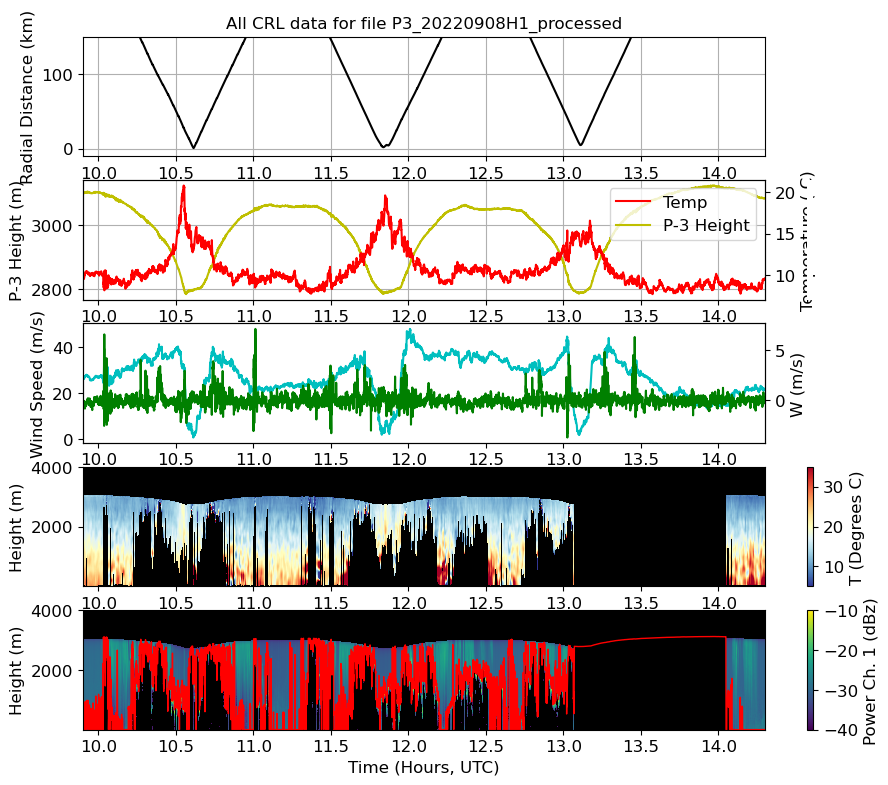

In [4]:
# make figure for processed crl data- are things going wrong?
plt.figure( figsize=(11, 9))
helper_fns.change_font_sizes( 12, 12)
print("starting figure")

crl_data = crl_processed # locally define bc of laziness
time = crl_processed.time.values
height = crl_processed.height.values
li, ri = 0, -1 # easily change limits here
yearval = '2022'

# plot radial distance axis
plt.subplot( 511)
plt.title( "All CRL data for file " + newname[:-3])
plt.plot( time, crl_data.center_dist, c='k', linewidth=1.5, label='Radial Distance')
plt.ylabel( "Radial Distance (km)")
plt.ylim( [-10, 150])
plt.grid()
helper_fns.add_blank_colorbar()
plt.xlim( [ time[li], time[ri]])

# plot p3 height and temps!
plt.subplot( 512)
plt.plot( time, crl_data.p3_height, c='y', linewidth=1.5)
plt.ylabel( "P-3 Height (m)")
plt.grid()
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot( time, crl_data.fl_T, c='r', linewidth=1.5, label='Temp')
ax2.set_ylabel( "Temperature ( C)")
ax2.axvline( x = -1000, c='y', label = 'P-3 Height')
ax2.legend(loc='upper right')
helper_fns.add_blank_colorbar()
plt.xlim( [ time[li], time[ri]])


# plot wind spd and w axes!
plt.subplot( 513)
plt.plot( time, crl_data.wind_speed, c='c', linewidth=1.5)
plt.ylabel( "Wind Speed (m/s)")
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot( time, crl_data.w, c='g', linewidth=1.5, label='w')
ax2.set_ylabel( "W (m/s)")
helper_fns.add_blank_colorbar()
plt.xlim( [ time[li], time[ri]])
print('wind speed plot created')

# plot temperature
plt.subplot( 514)
min = 5
max = 35
map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.pcolormesh( time[li : ri], height, crl_data.T.transpose()[ :, li:ri], vmin = min, vmax = max, cmap = map)
plt.colorbar(label="T (Degrees C)")
plt.ylabel("Height (m)")
ax = plt.gca()
ax.set_facecolor('k')
plt.xlim( [ time[li], time[ri]])
plt.ylim( [ np.nanmin( height), np.nanmax( height)])
print( "Temperature plot created")

# plot power ch1
# also find and plot cloud top heights!!
if yearval == '2021':
    min = -30
elif yearval == '2022':
    min = -40
print( "cutoff power = " + str( min))

H = crl_data.height
power = crl_data.P_ch1[ li:ri, :]
axis = crl_data.time[ li:ri]
p3_height = crl_data.p3_height[ li:ri]
cloudheights, cloudtime = find_cloud_tops.find_cloud_heights( H, power, axis, p3_height, cutoff_power = min)
plt.subplot( 515)
max = -10
plt.pcolormesh( axis, H, power.transpose(), vmin = min, vmax = max)
plt.plot( cloudtime, cloudheights, c='r', linewidth=1.0, label="cloud tops")
plt.colorbar(label="Power Ch. 1 (dBz)")
plt.ylabel("Height (m)")
ax = plt.gca()
ax.set_facecolor('k')
plt.xlabel( "Time (Hours, UTC)")


starting figure
wind speed plot created
Temperature plot created


Text(0.5, 0, 'Time (Hours, UTC)')

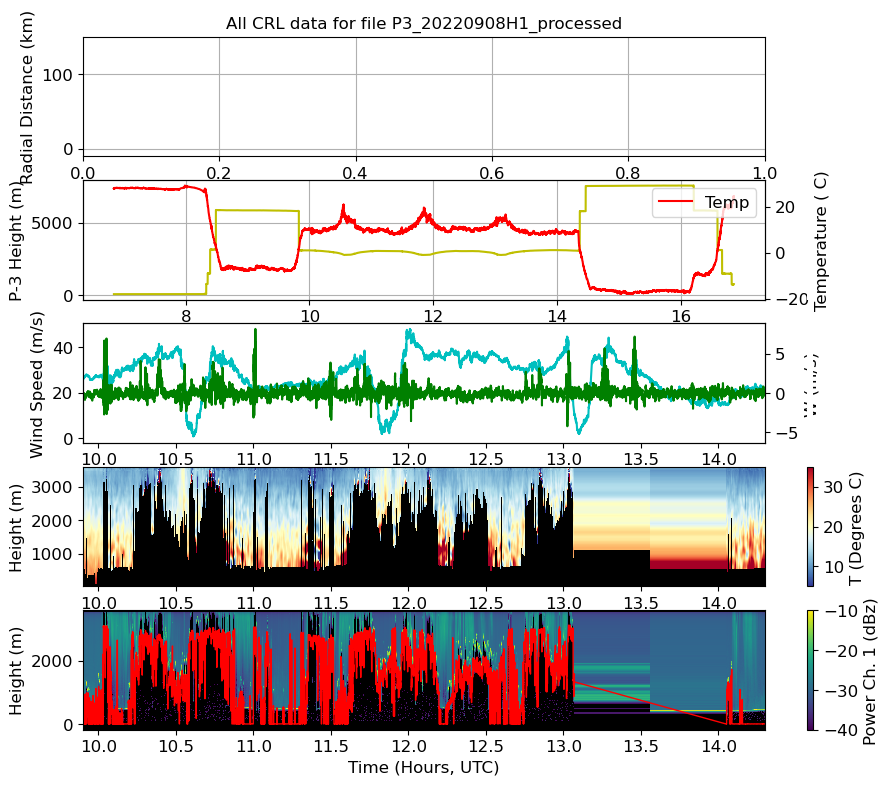

In [56]:
# recreate the plot above, but using the uncorrected, raw flight level and crl data
# make figure for processed crl data- are things going wrong?
plt.figure( figsize=(11, 9))
helper_fns.change_font_sizes( 12, 12)
print("starting figure")

time = crl_raw.time.values
height = -1000 * crl_raw.H.values
li, ri = 0, -1 # easily change limits here
yearval = '2022'
fl_data = fl_raw
crl_data = crl_raw

# creating the time (decimal) axis from raw fl data
interval_str = fl_data.attrs['TimeInterval']
h, m, s = float( interval_str[0:2]), float( interval_str[3:5]), float( interval_str[6:8])
start_time = h + m / 60 + s / 3600
# create the time array manually. This is possible because time values increase consistently at 1 second intervals!
fltime = np.empty( ( len( fl_data['Time'])))
for timei in range( len( fl_data['Time'])):
    # add to time array
    fltime[ timei] = start_time + timei / 3600

# plot radial distance axis
plt.subplot( 511)
plt.title( "All CRL data for file " + newname[:-3])
# plt.plot( time, crl_data.center_dist, c='k', linewidth=1.5, label='Radial Distance')
plt.ylabel( "Radial Distance (km)")
plt.ylim( [-10, 150])
plt.grid()
helper_fns.add_blank_colorbar()
# plt.xlim( [ time[li], time[ri]])

# plot p3 height and temps!
plt.subplot( 512)
plt.plot( fltime, fl_data['HT.d'], c='y', linewidth=1.5)
plt.ylabel( "P-3 Height (m)")
plt.grid()
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot( fltime, fl_data['TA.d'], c='r', linewidth=1.5, label='Temp')
ax2.set_ylabel( "Temperature ( C)")
# ax2.axvline( x = -1000, c='y', label = 'P-3 Height')
ax2.legend(loc='upper right')
helper_fns.add_blank_colorbar()
# plt.xlim( [ time[li], time[ri]])


# plot wind spd and w axes!
plt.subplot( 513)
plt.plot( fltime, fl_data['WS.d'], c='c', linewidth=1.5)
plt.ylabel( "Wind Speed (m/s)")
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot( fltime, fl_data['UWZ.d'], c='g', linewidth=1.5, label='w')
ax2.set_ylabel( "W (m/s)")
helper_fns.add_blank_colorbar()
plt.xlim( [ time[li], time[ri]])
print('wind speed plot created')

# plot temperature
plt.subplot( 514)
min = 5
max = 35
map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.pcolormesh( time[li : ri], height, crl_data.T.transpose()[ :, li:ri], vmin = min, vmax = max, cmap = map)
plt.colorbar(label="T (Degrees C)")
plt.ylabel("Height (m)")
ax = plt.gca()
ax.set_facecolor('k')
plt.xlim( [ time[li], time[ri]])
plt.ylim( [ np.nanmin( height), np.nanmax( height)])
print( "Temperature plot created")

plt.subplot( 515)
# plot power ch1
if yearval == '2021':
    min = -30
elif yearval == '2022':
    min = -40
max = -10
step1 = 10 * np.log10( crl_data.P_ch1 )
step2 = step1.where( step1.values > min)
power = step2.transpose()

plt.pcolormesh( time, height, power, vmin = min, vmax = max)
plt.plot( cloudtime, cloudheights, c='r', linewidth=1.0, label="cloud tops")
plt.colorbar(label="Power Ch. 1 (dBz)")
plt.ylabel("Height (m)")
ax = plt.gca()
ax.set_facecolor('k')
plt.xlabel( "Time (Hours, UTC)")


In [86]:
i0, i1 = 5650, 5750
print("Error happens here:")
print(crl_raw.time[i0:i1].values)
print("Typical timestep (s):")
print( (crl_raw.time[i0+1].values - crl_raw.time[i0].values) * 3600)

# find the time gap here
starti = 0
endi = 0
time = crl_raw.time.values
for timei in range(len(time) - 1):
    if time[timei+1] - time[timei] > .1:
        starti = timei
        endi = timei+1
        
# interpolate between the time gap!
step = 2 / 3600 # 2 second timestep for crl data
missingtimes = np.arange(time[starti] + step, time[endi], step) # increment the start by step to not duplicate that value

print(time[starti])
print(time[endi])
print(len(missingtimes))           
print(missingtimes)

# make an array full of nans for missing times!
# print(np.shape(crl_processed.T))
nanarray = np.empty( (len(missingtimes), np.shape(crl_raw.T)[1]))
nanarray[:] = np.nan

# check that it's full of nans!
print("First and last time errors (H):")
print(np.where(~ np.isnan(nanarray)))
print(np.shape(nanarray))

# slice the nans into the time array
newtime = np.concatenate(( np.concatenate((time[0:starti], missingtimes), axis=0), time[endi:len(time)-1]), axis=0)
print("Length of corrected time index")
print(len(newtime))

# now, slice the nan array into the temperature array... this will need to be done automatically for all crl arrays
array1, array2 = crl_raw.T[0:starti, :], crl_raw.T[endi:np.shape(crl_raw.T)[0]-1, :]

print("Shape of 1st and second halves of temperature array:")
print(np.shape(array1))
print(np.shape(array2))

totalarray = np.concatenate(( np.concatenate((array1, nanarray), axis=0), array2), axis=0)
print("shape of corrected array:")
print(np.shape(totalarray))

Error happens here:
[13.0391 13.0396 13.0402 13.0407 13.0413 13.0419 13.0424 13.043  13.0435
 13.0441 13.0446 13.0452 13.0457 13.0463 13.0469 13.0474 13.048  13.0485
 13.0491 13.0496 13.0502 13.0507 13.0513 13.0519 13.0524 13.053  13.0535
 13.0541 13.0546 13.0552 13.0557 13.0563 13.0569 13.0574 13.058  13.0585
 13.0591 13.0596 13.0602 13.0607 13.0613 13.0619 13.0624 13.063  13.0635
 13.0641 13.0646 13.0652 13.0657 13.0663 13.0669 13.0674 13.068  13.0685
 13.0691 13.0695 14.0483 14.0489 14.0495 14.0501 14.0506 14.0512 14.0517
 14.0523 14.0528 14.0534 14.054  14.0545 14.0551 14.0556 14.0562 14.0567
 14.0573 14.0578 14.0584 14.059  14.0595 14.0601 14.0606 14.0612 14.0617
 14.0623 14.0628 14.0634 14.064  14.0645 14.0651 14.0656 14.0662 14.0667
 14.0673 14.0678 14.0684 14.069  14.0695 14.0701 14.0706 14.0712 14.0717
 14.0723]
Typical timestep (s):
1.8024444580078125
13.0695
14.0483
1761
[13.07005553 13.07061108 13.07116664 ... 14.04672219 14.04727775
 14.0478333 ]
First and last time errors

Temperature plot created


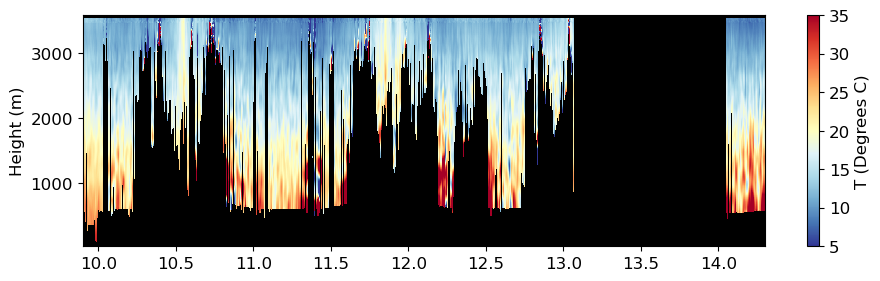

In [88]:
# make sure the corrections look right graphically!
plt.figure( figsize=(11, 3))
helper_fns.change_font_sizes( 12, 12)

# plot temperature
min = 5
max = 35
map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.pcolormesh( newtime, -1000*crl_raw.H.values, totalarray.transpose(), vmin = min, vmax = max, cmap = map)
plt.colorbar(label="T (Degrees C)")
plt.ylabel("Height (m)")
ax = plt.gca()
ax.set_facecolor('k')
plt.xlim( [ time[li], time[ri]])
plt.ylim( [ np.nanmin( height), np.nanmax( height)])
print( "Temperature plot created")
